Mini-project: Advanced Statistical Analysis of Apple Inc. Stock Data
**bold text**

What you will learn
Master statistical analysis of financial data using NumPy and SciPy.
Learn effective data visualization techniques with Matplotlib for financial trends.
Apply hypothesis testing to financial datasets for meaningful insights.
Understand and utilize advanced statistical techniques in NumPy and SciPy.


Project Description
Using the AAPL (Apple Inc.) stock dataset, conduct the following analyses:



Initial Data Exploration
Load the dataset using Pandas. Check for null values and understand data types.
Examine the time series properties of the data (e.g., frequency, trends).


Data Visualization
Utilize Matplotlib to plot closing prices and traded volume over time.
Create a candlestick chart to depict high and low prices.


Statistical Analysis
Compute summary statistics (mean, median, standard deviation) for key columns.
Analyze closing prices with a moving average.


Hypothesis Testing
Execute a t-test to compare average closing prices across different years.
Examine daily returns’ distribution and test for normality using SciPy.


Advanced Statistical Techniques (Bonus)
Statistical Functions in NumPy: Employ NumPy’s statistical functions for in-depth stock data analysis.
E.g., Use convolve for moving averages, or np.corrcoef to explore correlations between financial metrics.
Analyze correlations between moving averages of closing prices and trading volume across time periods.


Resources
Dataset: dowmload it from this repository : AAPL Stock Data (2007-2023)

Includes daily data like volume, VWAP, open, close, high, low prices, and number of transactions.



Project Submission
Submit a Jupyter Notebook with :

All analysis code and visualizations.
Detailed explanations of findings at each step.
A comprehensive summary of insights, focusing on advanced statistical analysis.
A ‘Reflection’ section detailing challenges and solutions.
Suggested structure:



1. Data Loading and Exploration
2. Data Visualization
3. Statistical Analysis
4. Hypothesis Testing
5. Advanced Statistical Techniques (Bonus)
    - Signal Processing using SciPy
    - Statistical Functions in NumPy
6. Summary and Insights
7. Reflection


Guidance
Experiment with different filters and parameters in signal processing techniques.
Thoroughly understand each statistical function and its insights on the stock data.


Submit your exercises :
Push your work to GitHub Github, including a README.md with a project overview and instructions for running the analysis.

In [4]:
# The dataset source - https://github.com/devtlv/MiniProject-DataAnalysis-W6D5-Apple_Stock_Data/blob/main/AAPL%2C%201D%2001012007-12072023.csv
# For the purposes of this exercise, I've downloaded the dataset

import pandas as pd
file_path = '/content/AAPL, 1D 01012007-12072023.csv'
df = pd.read_csv(file_path)

df.head()


,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


In [5]:
# I've noticed that pandas convert 1245444592.0	 to 1.245445e+09 (volume column)

In [6]:
# Check for null values
df.isnull().sum()  # Summarize the number of missing values for each column

,0
volume,0
vwap,0
open,0
close,0
high,0
low,0
time,0
transactions,0


In [7]:
# Understand data types of each column
df.info()  # This will show column names, non-null counts, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


We will now convert the time column to a proper datetime

In [8]:
# Convert 'time' column from Unix timestamp to a readable date format
df['time'] = pd.to_datetime(df['time'], unit='s')

# Check the new format of the 'time' column
df[['time']].head()  # Display the first few values of the 'time' column


,time
0,2007-01-03 05:00:00
1,2007-01-04 05:00:00
2,2007-01-05 05:00:00
3,2007-01-08 05:00:00
4,2007-01-09 05:00:00


Examine the time series properties of the data (e.g., frequency, trends).

I really don't know what should we do here???

**Data Visualization**

Utilize Matplotlib to plot closing prices and traded volume over time.

Create a candlestick chart to depict high and low prices.

I will create two subplots - one of closing prices and another for traded volume but put them verticaly

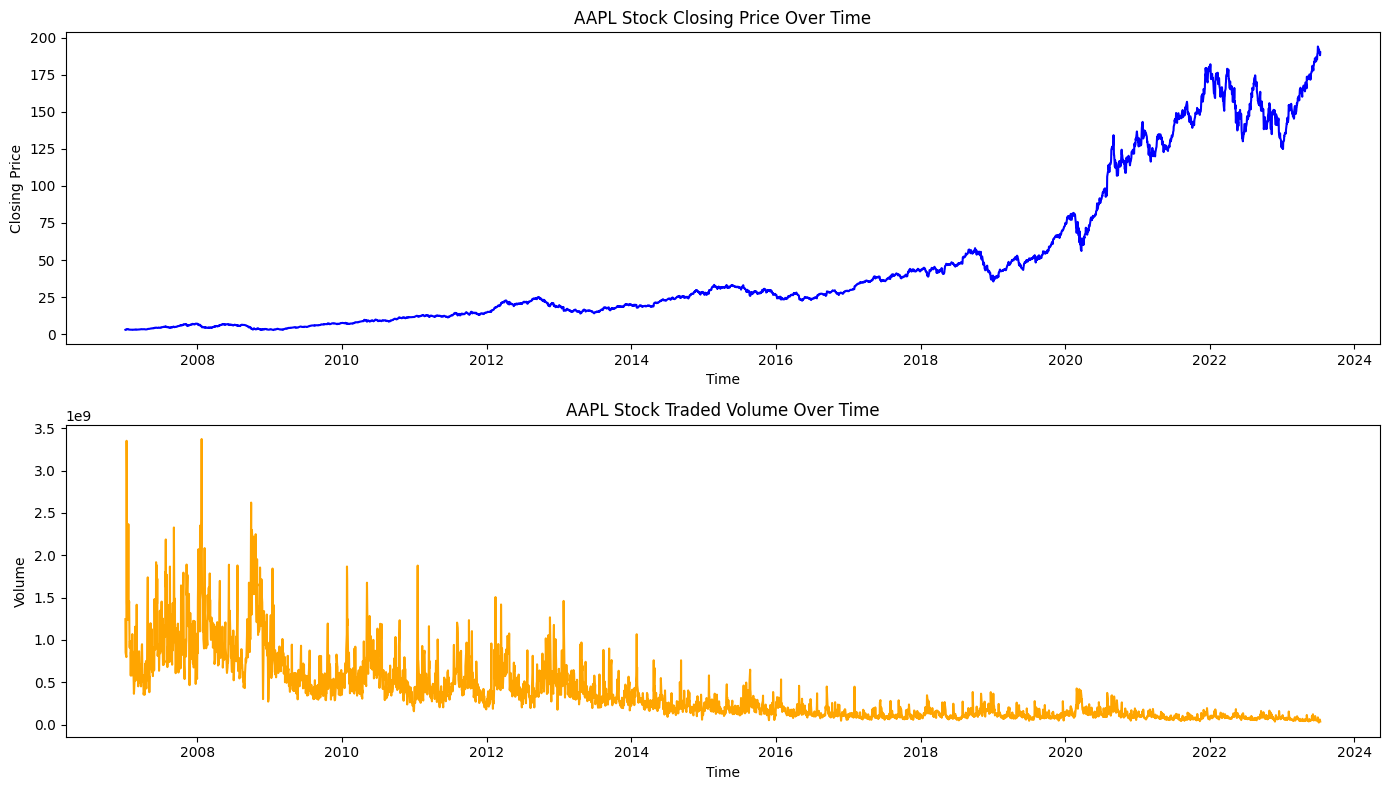

In [12]:
import matplotlib.pyplot as plt

# Step 1: Create a plot with two subplots - closing price and traded volume
plt.figure(figsize=(14,8))

# Subplot 1: Closing Prices
plt.subplot(2, 1, 1)
plt.plot(df['time'], df['close'], label='Closing Price', color='blue')
plt.title('AAPL Stock Closing Price Over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')

# Subplot 2: Traded Volume
plt.subplot(2, 1, 2)
plt.plot(df['time'], df['volume'], label='Traded Volume', color='orange')
plt.title('AAPL Stock Traded Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')

plt.tight_layout()  # So that subplots don’t overlap
plt.show()


candlestick chart


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


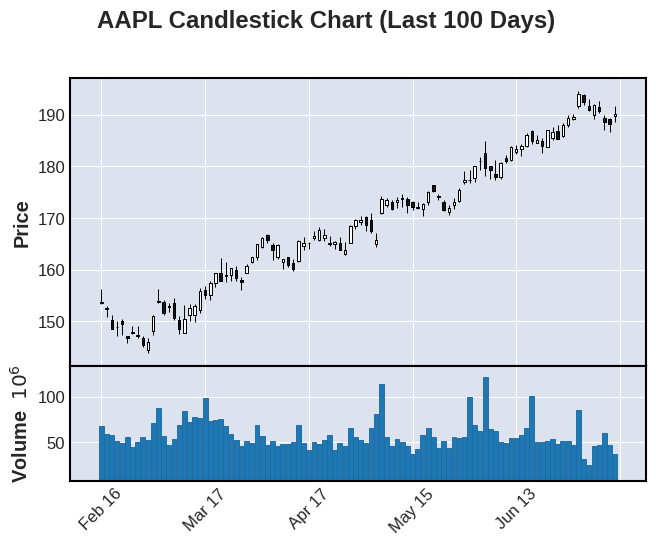

In [13]:
!pip install mplfinance


import mplfinance as mpf

# Prepare data for candlestick chart
df_candlestick = df.set_index('time')[['open', 'high', 'low', 'close', 'volume']]

# Plot the candlestick chart for the last 100 days
mpf.plot(df_candlestick[-100:], type='candle', volume=True, title='AAPL Candlestick Chart (Last 100 Days)')


Statistical Analysis

Compute summary statistics (mean, median, standard deviation) for key columns.

Analyze closing prices with a moving average.

In [22]:
# Step 1: Compute summary statistics for key columns
summary_stats = df[['close', 'volume', 'open', 'high', 'low']].describe()
print(summary_stats)

# Step 2: Compute specific metrics - mean, median, and standard deviation
mean_close = df['close'].mean()
median_close = df['close'].median()
std_close = df['close'].std()

print("\nMean Close Price:", mean_close)
print("Median Close Price:", median_close)
print("Standard Deviation of Close Price:", std_close)

mean_volume = df['volume'].mean()
median_volume = df['volume'].median()
std_volume = df['volume'].std()

print("\nMean Traded Volume:", mean_volume)
print("Median Traded Volume:", median_volume)
print("Standard Deviation of Traded Volume:", std_volume)


             close        volume         open         high          low
count  4159.000000  4.159000e+03  4159.000000  4159.000000  4159.000000
mean     46.396058  3.662925e+08    46.362788    46.881127    45.865790
std      50.293482  3.724793e+08    50.235593    50.843874    49.680104
min       2.792900  2.422234e+07     2.835400     2.928600     2.792900
25%      11.947150  1.067497e+08    11.955700    12.028400    11.853600
50%      25.825000  2.136463e+08    25.775000    26.262800    25.680000
75%      52.231250  4.965321e+08    52.263750    52.626250    51.796250
max     193.970000  3.373042e+09   193.780000   194.480000   191.760000

Mean Close Price: 46.39605770617938
Median Close Price: 25.825
Standard Deviation of Close Price: 50.293482384840615

Mean Traded Volume: 366292450.04688627
Median Traded Volume: 213646276.0
Standard Deviation of Traded Volume: 372479281.05208224


Analyze Closing Prices with a Moving Average

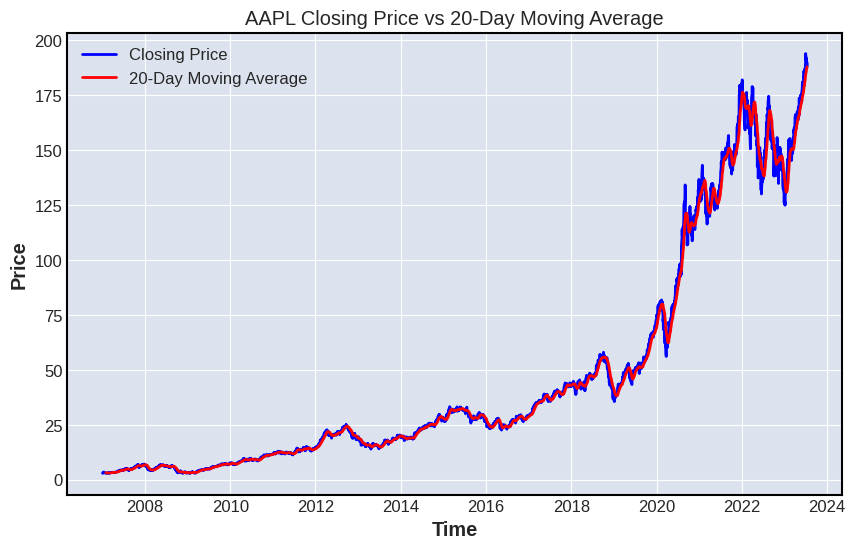

In [23]:
# Step 3: Calculate the 20-day moving average of closing prices
df['20_day_MA'] = df['close'].rolling(window=20).mean()

# Step 4: Plot the original closing prices and the moving average
plt.figure(figsize=(10,6))
plt.plot(df['time'], df['close'], label='Closing Price', color='blue')
plt.plot(df['time'], df['20_day_MA'], label='20-Day Moving Average', color='red')
plt.title('AAPL Closing Price vs 20-Day Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Extract closing prices for two years:

We will filter the data for two specific years (e.g., 2019 and 2020).

Perform the t-test: We'll use the t-test from the SciPy library to compare the means of the closing prices from these two years.

In [26]:
from scipy import stats

# Step 1: Extract closing prices for two specific years (e.g., 2019 and 2020)
df['year'] = df['time'].dt.year
closing_2019 = df[df['year'] == 2019]['close']
closing_2020 = df[df['year'] == 2020]['close']

# Step 2: Perform a t-test to compare the means of the two years
t_stat, p_value = stats.ttest_ind(closing_2019, closing_2020, equal_var=False)

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -29.341928670570784
P-value: 6.643474619805916e-94


Examine daily returns’ distribution and test for normality using SciPy.

In [27]:
# Step 1: Calculate daily returns
df['daily_return'] = df['close'].pct_change()

# Step 2: Perform a Shapiro-Wilk test for normality
shapiro_stat, shapiro_p_value = stats.shapiro(df['daily_return'].dropna())

# Print results
print(f"Shapiro-Wilk Statistic: {shapiro_stat}")
print(f"Shapiro-Wilk P-value: {shapiro_p_value}")



Shapiro-Wilk Statistic: 0.940666076855671
Shapiro-Wilk P-value: 6.180858977992611e-38


In [30]:
# Calculate daily returns as the percentage change in closing price
df['daily_return'] = df['close'].pct_change()
print(df['daily_return'].head(7))

# Drop the first row (since the first return will be NaN)
df = df.dropna(subset=['daily_return'])



1         NaN
2   -0.007126
3    0.004938
4    0.083079
5    0.047851
6   -0.012383
7   -0.012305
Name: daily_return, dtype: float64


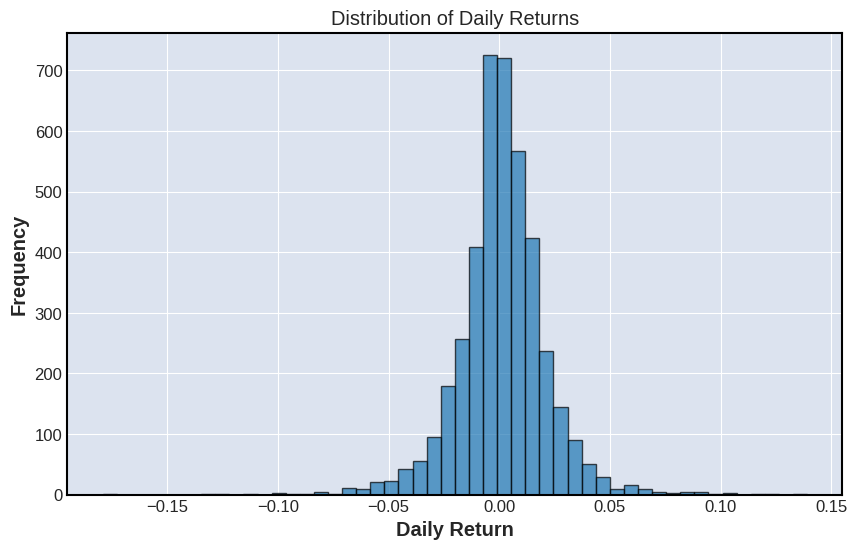

In [31]:
# Let's throw a histogram to see the distribution

import matplotlib.pyplot as plt

# Plot a histogram of daily returns
plt.figure(figsize=(10,6))
plt.hist(df['daily_return'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


I think that horizontal histogram would make sense here, I want to see value for every bin.

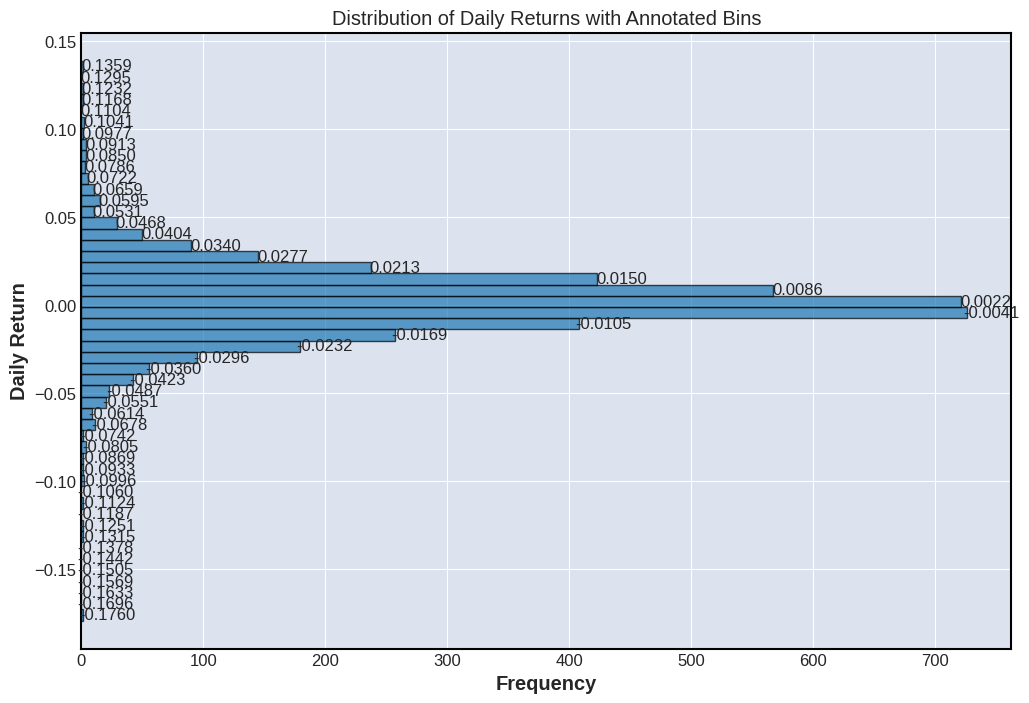

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and horizontal histogram
plt.figure(figsize=(12, 8))

# Generate the histogram, with bins aligned horizontally
counts, bins, patches = plt.hist(df['daily_return'], bins=50, edgecolor='k', alpha=0.7, orientation='horizontal')

# Set title and labels
plt.title('Distribution of Daily Returns with Annotated Bins')
plt.xlabel('Frequency')
plt.ylabel('Daily Return')

# Annotate each bin with its corresponding value
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x, patch in zip(counts, bin_centers, patches):
    # Display the count for each bin on the chart
    plt.text(count + 20, x, f'{x:.4f}', ha='center', va='center')  # Adjust +20 for spacing

plt.show()


In [ ]:
# After seeing distribution with "naked eye" we can perform Sahpiro-Wilk test
# to confirm if the daily returns are normally distributed

In [32]:
from scipy import stats

# Perform the Shapiro-Wilk test for normality
shapiro_stat, shapiro_p_value = stats.shapiro(df['daily_return'])

# Print the results
print(f"Shapiro-Wilk Statistic: {shapiro_stat}")
print(f"Shapiro-Wilk P-value: {shapiro_p_value}")


Shapiro-Wilk Statistic: 0.9406180291766578
Shapiro-Wilk P-value: 6.066311782928952e-38


Shapiro-Wilk Statistic: This number indicates how closely the data matches a normal distribution, 1 is perfect normal distribution.
